In [1]:
import pandas as pd

In [2]:
#dataparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv',
                  parse_dates=['Month'],
                  index_col='Month')
data.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [3]:
data = data.rename(columns = {'#Passengers':'Passengers'})

In [4]:
ts = data['Passengers']

In [5]:
ts.rolling(window=2).mean()

Month
1949-01-01      NaN
1949-02-01    115.0
1949-03-01    125.0
1949-04-01    130.5
1949-05-01    125.0
              ...  
1960-08-01    614.0
1960-09-01    557.0
1960-10-01    484.5
1960-11-01    425.5
1960-12-01    411.0
Name: Passengers, Length: 144, dtype: float64

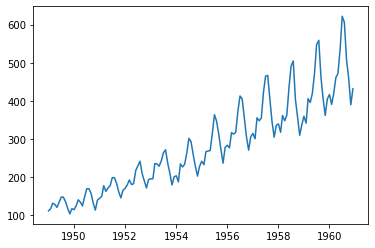

In [6]:
import matplotlib.pyplot as plt
plt.plot(ts);

### a) For the given dataset plotting trend, seasonality and residuals

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

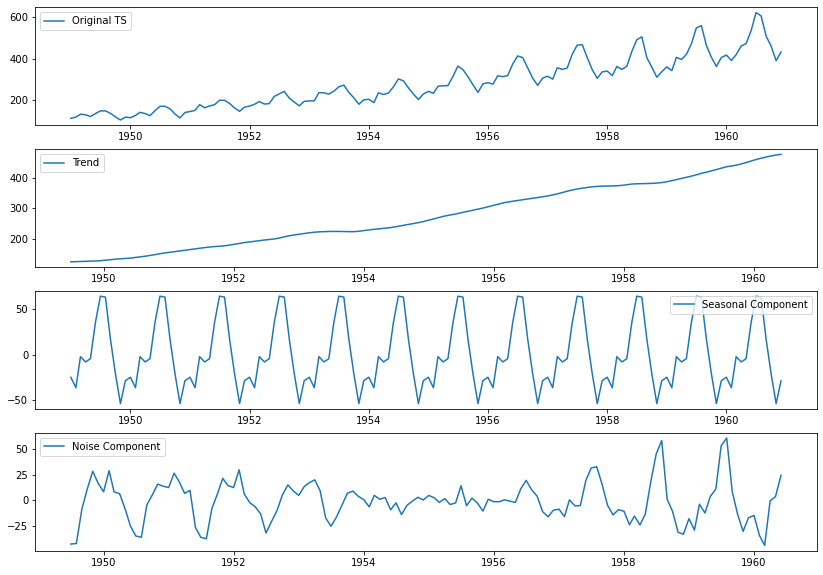

In [8]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(ts, label= 'Original TS');
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label= 'Trend');
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label= 'Seasonal Component');
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label= 'Noise Component');
plt.legend(loc='best');

### b) Apply ADF Test to test stationarity of residuals. Report whether residuals are stationary or not.

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts)
dftest

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [10]:
def test_stationarity(timeseries):
    
    mavg = timeseries.rolling(window= 6).mean()
    plt.plot(timeseries, color='blue', label='original')
    plt.plot(mavg, color='red', label='Moving average')
    plt.legend(loc='best')
    plt.title('Original data vs Moving Average')

    print('Result of Dicky Fuller test')
    dftest = adfuller(ts)
    dfout = pd.Series(dftest[0:4], index=['Test statistics', 'p-value','#lags used','#Observations used' ])

    for key, val in dftest[4].items():
        dfout['Critical value (%s)' %key] = val
    print(dfout)

In [11]:
import numpy as np
ts_log = np.log(ts)

Result of Dicky Fuller test
Test statistics           0.815369
p-value                   0.991880
#lags used               13.000000
#Observations used      130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


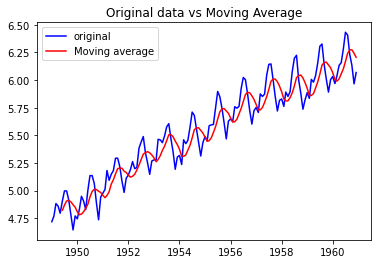

In [12]:
test_stationarity(ts_log)

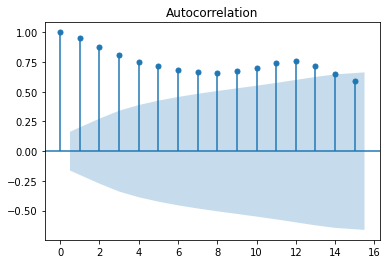

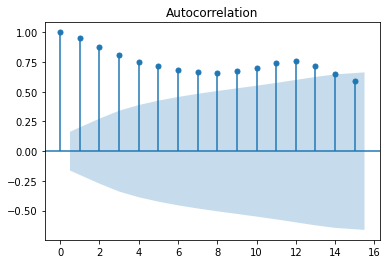

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts, lags = 15) 

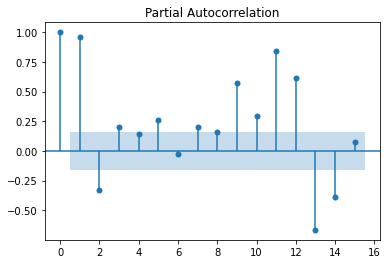

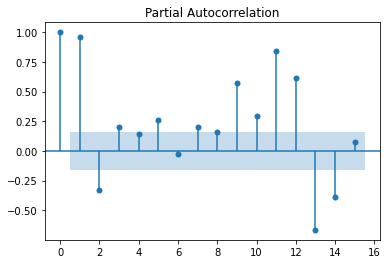

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts, lags = 15, method = "ols")

Result of Dicky Fuller test
Test statistics           0.815369
p-value                   0.991880
#lags used               13.000000
#Observations used      130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


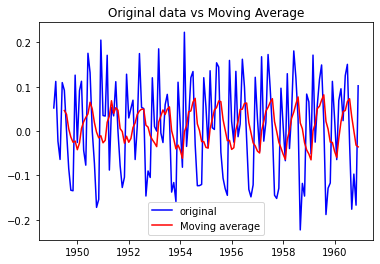

In [15]:
# reverse to the original
ts_exp = np.exp(ts_log)

# see the difference
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

# now test the stationarity
test_stationarity(ts_log_diff)

### Finally differencing seems to be stationary as derived from the above plot

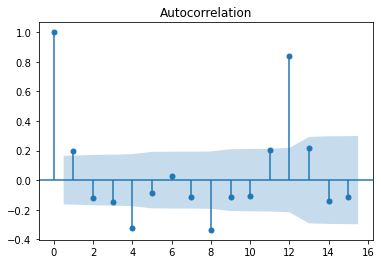

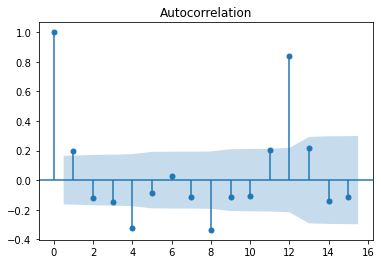

In [16]:
plot_acf(ts_log_diff, lags = 15) 

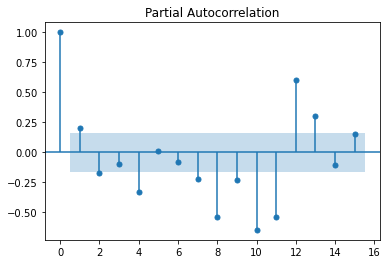

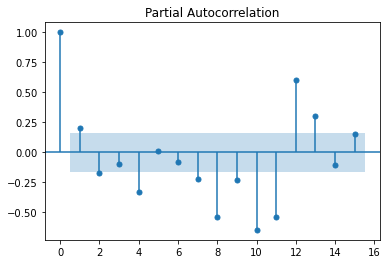

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_log_diff, lags = 15, method = "ols")